In [1]:
# Run some setup code for this notebook.

import random
import numpy as np
import matplotlib.pyplot as plt
import os


from __future__ import print_function

from builtins import range
from six.moves import cPickle as pickle
from imageio import imread
import platform

# This is a bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [2]:
# This cell loads the training and testing dataset. Please note the variables at
# the end of the cell as you would require them to access the train/test data 
# and labels throughout the assignment
def load_pickle(f):
    version = platform.python_version_tuple()
    if version[0] == '2':
        return  pickle.load(f)
    elif version[0] == '3':
        return  pickle.load(f, encoding='latin1')
    raise ValueError("invalid python version: {}".format(version))


def load_CIFAR_batch(filename):
    """ load single batch of cifar """
    with open(filename, 'rb') as f:
        datadict = load_pickle(f)
        X = datadict['data']
        Y = datadict['labels']
        X = X.reshape(10000, 3, 32, 32).transpose(0,2,3,1).astype("float")
        Y = np.array(Y)
        return X, Y


def load_CIFAR10(ROOT):
    """ load all of cifar """
    xs = []
    ys = []
    for b in range(1,6):
        f = os.path.join(ROOT, 'data_batch_%d' % (b, ))
        X, Y = load_CIFAR_batch(f)
        xs.append(X)
        ys.append(Y)
    Xtr = np.concatenate(xs)
    Ytr = np.concatenate(ys)
    del X, Y
    Xte, Yte = load_CIFAR_batch(os.path.join(ROOT, 'test_batch'))
    return Xtr, Ytr, Xte, Yte


cifar10_dir = 'cifar-10-batches-py'

# Cleaning up variables to prevent loading data multiple times
try:
    del X_train, y_train
    del X_test, y_test
    print('Clear previously loaded data.')
except:
    pass

X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)

# As a sanity check, we print out the size of the training and test data.
print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Training data shape:  (50000, 32, 32, 3)
Training labels shape:  (50000,)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000,)


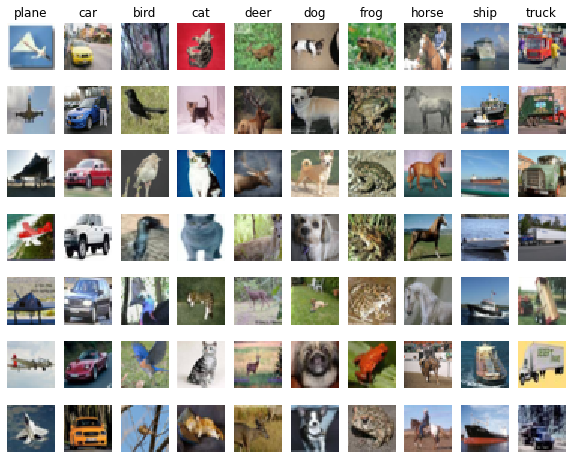

In [3]:
# Visualize some examples from the dataset.
# We show a few examples of training images from each class.
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

In [4]:
# Subsample the data for more efficient code execution in this exercise
num_training = 5000
mask = list(range(num_training))
X_train = X_train[mask]
y_train = y_train[mask]

num_test = 500
mask = list(range(num_test))
X_test = X_test[mask]
y_test = y_test[mask]

# Reshape the image data into rows
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))
print(X_train.shape, X_test.shape)

(5000, 3072) (500, 3072)


In [5]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [6]:
rand_clf = RandomForestClassifier()

In [7]:
rand_clf.fit(X_train,y_train)

RandomForestClassifier()

In [8]:
y_pred = rand_clf.predict(X_test)
y_pred

array([6, 8, 8, 8, 4, 6, 6, 6, 5, 8, 8, 9, 5, 1, 9, 2, 5, 3, 8, 6, 7, 0,
       0, 1, 2, 2, 5, 9, 9, 6, 6, 2, 2, 2, 9, 1, 6, 9, 8, 5, 0, 6, 9, 4,
       8, 9, 4, 1, 4, 4, 9, 8, 6, 6, 8, 8, 5, 6, 8, 4, 2, 6, 6, 9, 4, 6,
       1, 0, 3, 9, 0, 4, 8, 8, 9, 2, 9, 5, 5, 8, 8, 1, 1, 0, 0, 9, 2, 8,
       8, 9, 8, 4, 8, 4, 4, 4, 4, 0, 0, 9, 5, 7, 6, 3, 1, 8, 6, 6, 3, 5,
       6, 5, 6, 2, 9, 2, 0, 9, 3, 5, 8, 4, 2, 2, 0, 4, 8, 5, 5, 2, 4, 9,
       9, 6, 0, 3, 9, 0, 6, 8, 4, 8, 2, 2, 0, 9, 6, 5, 3, 5, 1, 1, 6, 8,
       4, 5, 2, 9, 6, 0, 0, 1, 1, 4, 0, 7, 8, 6, 6, 9, 0, 9, 0, 8, 4, 9,
       0, 6, 3, 0, 0, 3, 6, 4, 7, 8, 6, 7, 1, 8, 2, 5, 5, 1, 6, 6, 8, 0,
       7, 5, 7, 9, 0, 7, 1, 2, 0, 2, 7, 8, 2, 8, 0, 9, 8, 2, 0, 9, 0, 4,
       7, 6, 8, 5, 9, 9, 9, 0, 2, 7, 5, 1, 3, 4, 8, 0, 6, 9, 0, 3, 1, 2,
       9, 8, 0, 1, 7, 0, 5, 1, 7, 3, 6, 6, 4, 9, 6, 9, 9, 4, 8, 8, 1, 3,
       0, 8, 8, 4, 9, 0, 4, 5, 6, 2, 8, 3, 9, 2, 7, 5, 9, 4, 2, 9, 9, 9,
       1, 8, 7, 9, 1, 2, 4, 1, 3, 2, 6, 0, 0, 6, 6,

In [9]:
rand_clf.score(X_test,y_test)

0.374

In [11]:
grid_param = {
    'n_estimators':[90,100,115,130],
    'criterion':['gini','entropy'],
    'max_depth': range(2,20,1),
    'min_samples_leaf':range(1,10,1),
    'min_samples_split':range(2,10,1),
    'max_features':['auto','log2']
}

In [12]:
grid_search = GridSearchCV(estimator=rand_clf,param_grid=grid_param,cv=5,n_jobs=-1)

In [ ]:
grid_search.fit(X_train,y_train)

In [ ]:
grid_search.best_params_

In [ ]:
best_random_grid = rand_search.best_estimator_
best_random_grid

In [ ]:
y_pred = best_random_grid.predict(x_test)

In [ ]:
import pickle
filename = 'Random_Forest_classifier.pickle'
pickle.dump(grid_search,open(filename,'wb'))